# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Collection (Web Scraping)

In [2]:
reviews = []
stars = []
country = []
date = []

In [3]:
page_size = 100

for i in range(1, 38):

#     print(f"Scraping page {i}")
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_= "text_content"):
        reviews.append(item.text)
        
    for item in soup.find_all("div", class_= "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    for item in soup.find_all("time"):
        date.append(item.text)
        
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))
        
#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())
    
#    print(f"   ---> {len(reviews)} total reviews")

Error on page 32
Error on page 34
Error on page 34
Error on page 36
Error on page 36


In [4]:
len(reviews)

3700

In [5]:
stars = stars[:3700]

In [6]:
len(stars)

3700

In [7]:
len(date)

3700

In [8]:
len(country)

3700

In [9]:
df = pd.DataFrame({"reviews" : reviews, "stars" : stars, "date" : date, "country" : country})

df.head()

,reviews,stars,date,country
0,Not Verified | We have flown BA five times fr...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,17th February 2024,United States
1,✅ Trip Verified | London Heathrow to Istanbul...,3,17th February 2024,United Kingdom
2,"Not Verified | Jan 30th, I booked a last-minut...",3,16th February 2024,United States
3,✅ Trip Verified | I am a British Airways Gold ...,2,11th February 2024,United States
4,Not Verified | Another case of reviewing Brit...,5,8th February 2024,United Kingdom


In [10]:
df.shape

(3700, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3700 non-null   object
 1   stars    3700 non-null   object
 2   date     3700 non-null   object
 3   country  3700 non-null   object
dtypes: object(4)
memory usage: 115.8+ KB


In [12]:
df.describe()

,reviews,stars,date,country
count,3700,3700,3700,3700
unique,3687,12,1840,72
top,BA176 JFK to Heathrow 13 October 2014. The out...,1,19th January 2015,United Kingdom
freq,2,870,26,2310


In [13]:
df.to_csv("C:/Users/Admin/Desktop/Projects/British Airways/Web Reviews/BA_reviews")

# Cleaning Data

In [14]:
df.dtypes

reviews    object
stars      object
date       object
country    object
dtype: object

In [15]:
df.date = pd.to_datetime(df.date, format='mixed')
df.date.head(100)

0    2024-02-17
1    2024-02-17
2    2024-02-16
3    2024-02-11
4    2024-02-08
        ...    
95   2023-09-23
96   2023-09-22
97   2023-09-22
98   2023-09-20
99   2023-09-20
Name: date, Length: 100, dtype: datetime64[ns]

In [16]:
df.head(-1)

,reviews,stars,date,country
0,Not Verified | We have flown BA five times fr...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,2024-02-17,United States
1,✅ Trip Verified | London Heathrow to Istanbul...,3,2024-02-17,United Kingdom
2,"Not Verified | Jan 30th, I booked a last-minut...",3,2024-02-16,United States
3,✅ Trip Verified | I am a British Airways Gold ...,2,2024-02-11,United States
4,Not Verified | Another case of reviewing Brit...,5,2024-02-08,United Kingdom
...,...,...,...,...
3694,BA Heathrow to Madrid Club Euro. Disappointing...,10,2014-05-26,United Kingdom
3695,Club Europe London Heathrow T3 to Lisbon. T3 l...,5,2014-05-26,United Kingdom
3696,TXL-LHR-SFO. TXL-LHR on an A321 it was an unev...,6,2014-05-25,India
3697,San Diego return business class (the seat was ...,7,2014-05-24,United Kingdom


In [17]:
df.stars.value_counts()

stars
1                                870
2                                420
3                                409
8                                364
10                               315
7                                309
9                                305
4                                248
5                                227
6                                191
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     37
None                               5
Name: count, dtype: int64

### Removing Unnecessary Rows

In [18]:
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
df.stars.value_counts()

stars
1       870
2       420
3       409
8       364
10      315
7       309
9       305
5       264
4       248
6       191
None      5
Name: count, dtype: int64

### We still have None Stars for 5 Counts, Let's remove them as they can be counted as outliers 

In [19]:
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)
df.stars.unique()

array(['5', '3', '2', '1', '8', '6', '9', '4', '10', '7'], dtype=object)

In [20]:
df.isnull().value_counts()

reviews  stars  date   country
False    False  False  False      3695
Name: count, dtype: int64

### The Data is Clean with No Null Values

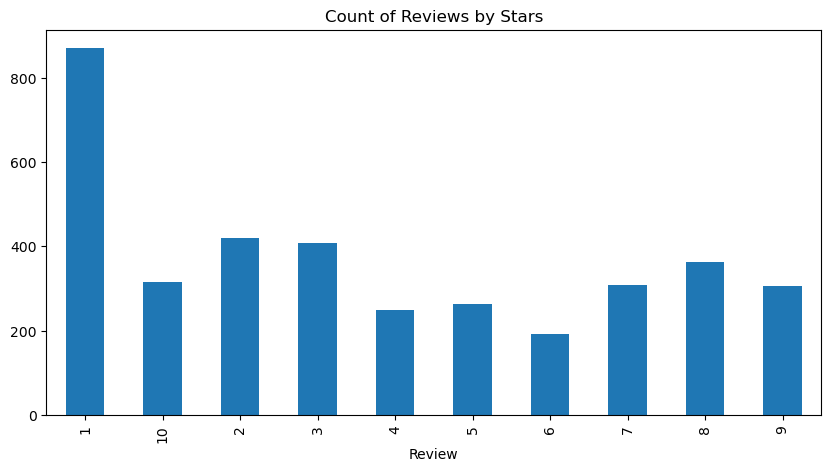

In [21]:
ax = df['stars'].value_counts().sort_index() \
    .plot(kind='bar', title='Count of Reviews by Stars', 
          figsize=(10, 5))
ax.set_xlabel('Review')
plt.show()

### We can see that Most Reviews are rated at 1,2,3.

Also the reviews aren't in Order

In [22]:
#!pip install natsort
from natsort import natsort_key

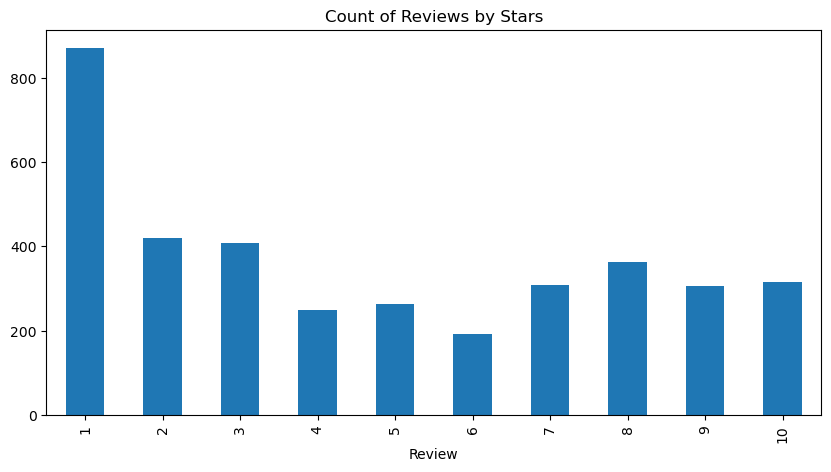

In [23]:
ax = df['stars'].value_counts().sort_index(key=natsort_key) \
    .plot(kind='bar', title='Count of Reviews by Stars', 
          figsize=(10, 5))
ax.set_xlabel('Review')
plt.show()

In [24]:
df.reset_index(drop=True)

,reviews,stars,date,country
0,Not Verified | We have flown BA five times fr...,5,2024-02-17,United States
1,✅ Trip Verified | London Heathrow to Istanbul...,3,2024-02-17,United Kingdom
2,"Not Verified | Jan 30th, I booked a last-minut...",3,2024-02-16,United States
3,✅ Trip Verified | I am a British Airways Gold ...,2,2024-02-11,United States
4,Not Verified | Another case of reviewing Brit...,5,2024-02-08,United Kingdom
...,...,...,...,...
3690,Club Europe London Heathrow T3 to Lisbon. T3 l...,5,2014-05-26,United Kingdom
3691,TXL-LHR-SFO. TXL-LHR on an A321 it was an unev...,6,2014-05-25,India
3692,San Diego return business class (the seat was ...,7,2014-05-24,United Kingdom
3693,Flew British Airways from Sydney to Venice on ...,2,2014-05-20,Australia


## Lets Breakdown the reviews Using Word Net Lemmatizer and Stopwords of NLTK Library, to get an easy understanding of the Reviews.

In [25]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


lem = WordNetLemmatizer()

review_data = df.reviews.str.replace(r'^(✅ Trip Verified |Not Verified |)','',regex = True)

corpus = []

for rev in review_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lem.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)
    
df["corpus"] = corpus
df["corpus"]

0       flown ba five time western usa england always ...
1       london heathrow istanbul start half term schoo...
2       jan th booked last minute transatlantic flight...
3       british airway gold guest list member lifetime...
4       another case reviewing british airway flight a...
                              ...                        
3695    club europe london heathrow lisbon lounge good...
3696    txl lhr sfo txl lhr uneventful flight drink se...
3697    san diego return business class seat comfortab...
3698    flew british airway sydney venice nd april ret...
3699    recently returned mauritius gatwick club world...
Name: corpus, Length: 3695, dtype: object

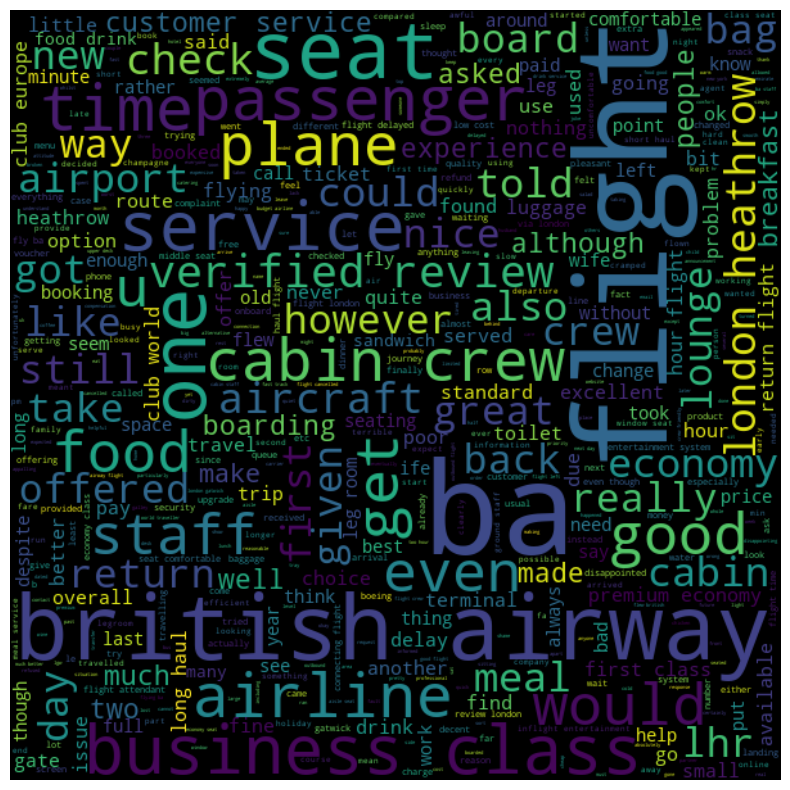

In [99]:
import nltk
import wordcloud
from wordcloud import WordCloud

reviews = " ".join(df.corpus)
stop_words=set(stopwords.words('english'))
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## There are still some Irrelevant Words in the map that do not help in Decoding the text, Let's Remove them.

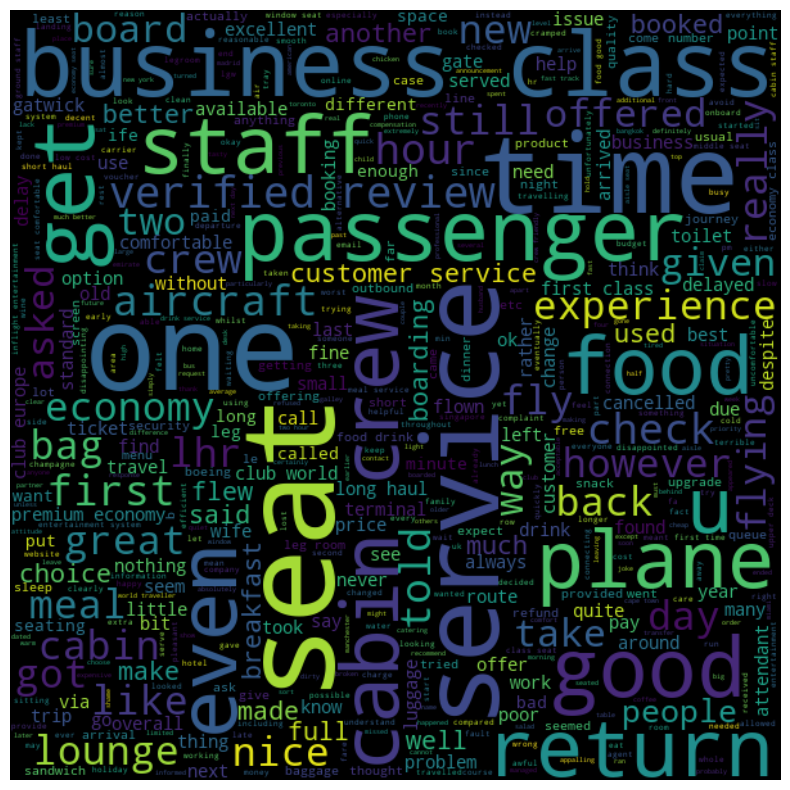

In [27]:
stop_words.update(["ba","airline","flight","british","airway","could","would","airport","london",
                  "heathrow","also","going","though","although"])
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
from collections import Counter
from sklearn.feature_extraction import text

words=reviews.split(" ")
stop_words=text.ENGLISH_STOP_WORDS.union(["ba","airline","flight","british","airway","could","would","airport","london",
                  "heathrow","also","going","u","passenger","plane","1hr","hour"])

new_words = [word for word in words if word not in stopwords]

word_freq = Counter(new_words).most_common(25)
for word, freq in word_freq:
    print(f"{word}: {freq}")

seat: 4475
service: 2992
time: 2457
food: 2351
crew: 2208
good: 2088
cabin: 2054
class: 1971
business: 1619
staff: 1571
economy: 1434
check: 1301
drink: 1206
meal: 1160
lounge: 1111
return: 1102
club: 1088
lhr: 1064
boarding: 1016
customer: 969
experience: 968
review: 945
bag: 933
new: 895
fly: 890


### These are the Most Used words in the reviews, but individually these words do not mean anything

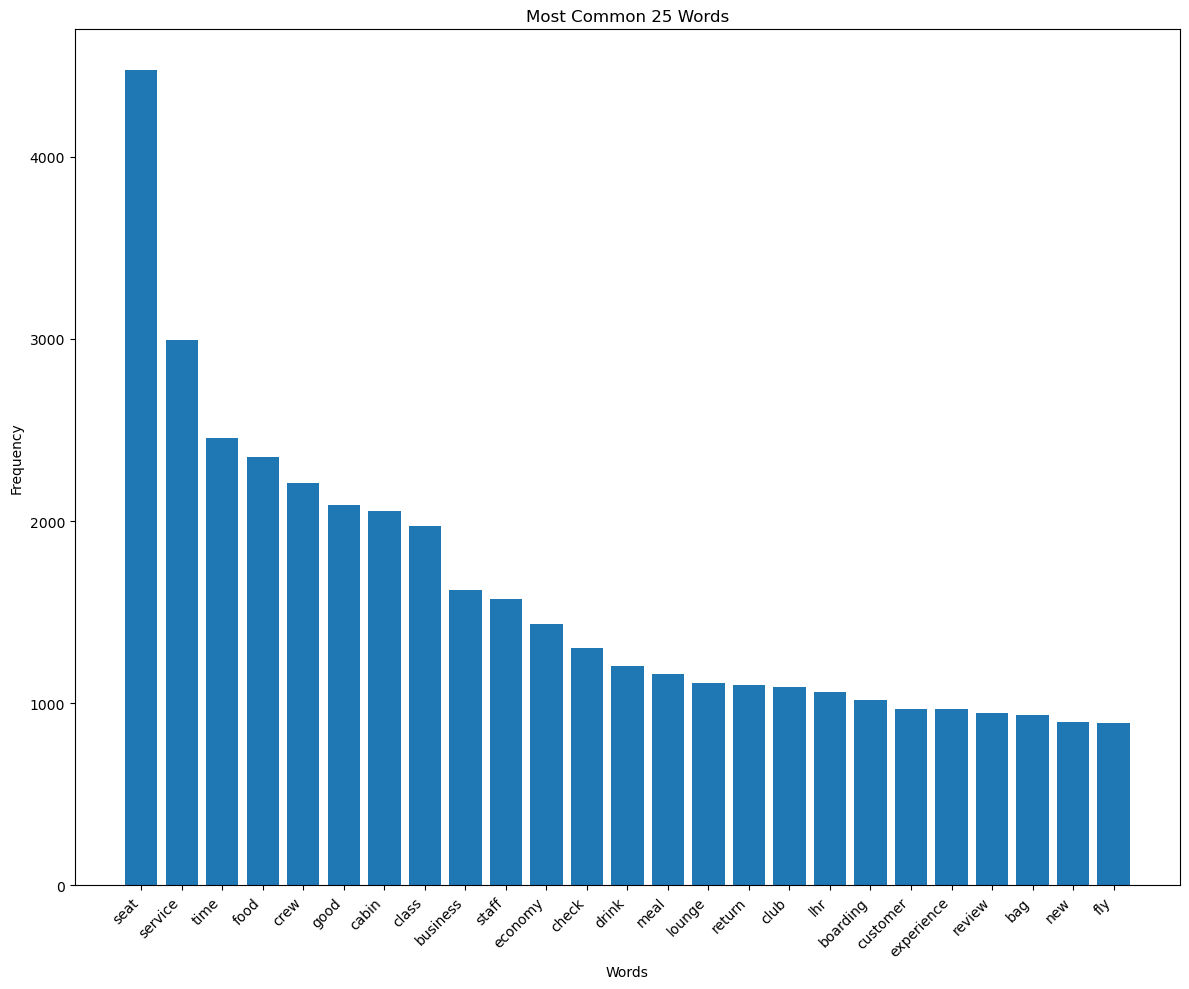

In [29]:
words, frequencies = zip(*word_freq)

plt.figure(figsize=(12,10))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common 25 Words')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping

# Display the plot
plt.show()

<Axes: >

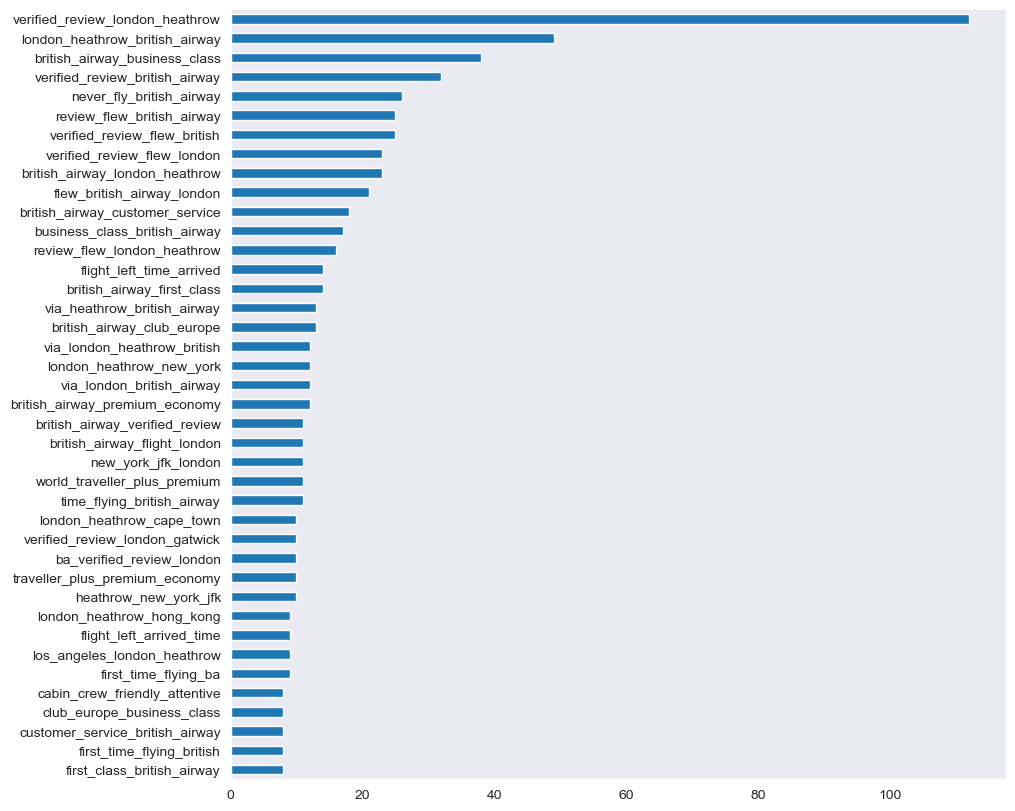

In [100]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stop_words]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

### Here some Bonded words give some insight, like cabin crew friendly attentive, never fly british airways and some others give flight routes like London-Hong Kong, London-NYK, London-Los Angeles

In [31]:
df = df.reset_index().rename(columns={'index': 'Id'})
df.head()

,Id,reviews,stars,date,country,corpus
0,0,Not Verified | We have flown BA five times fr...,5,2024-02-17,United States,flown ba five time western usa england always ...
1,1,✅ Trip Verified | London Heathrow to Istanbul...,3,2024-02-17,United Kingdom,london heathrow istanbul start half term schoo...
2,2,"Not Verified | Jan 30th, I booked a last-minut...",3,2024-02-16,United States,jan th booked last minute transatlantic flight...
3,3,✅ Trip Verified | I am a British Airways Gold ...,2,2024-02-11,United States,british airway gold guest list member lifetime...
4,4,Not Verified | Another case of reviewing Brit...,5,2024-02-08,United Kingdom,another case reviewing british airway flight a...


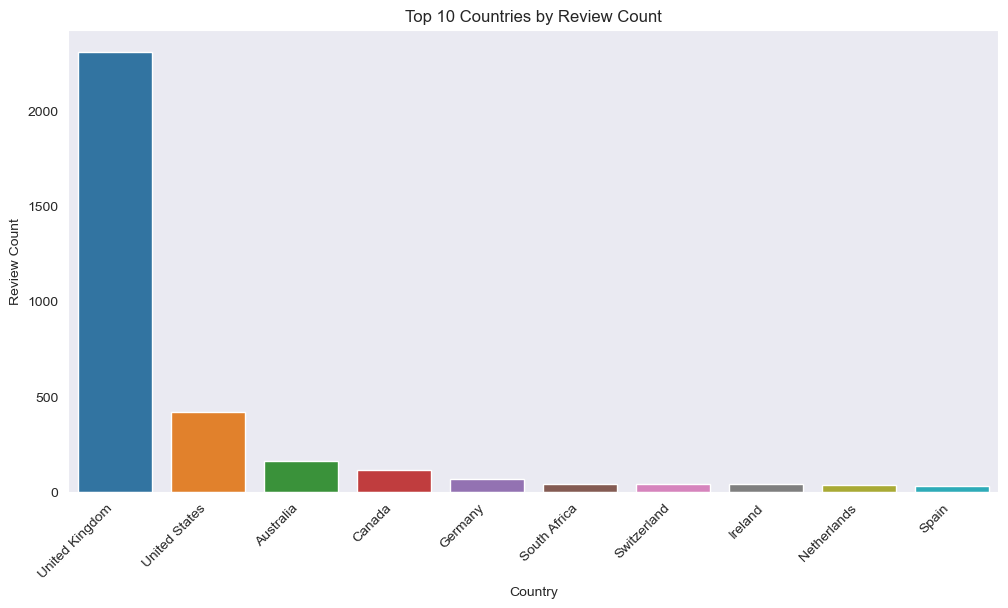

In [85]:
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'review_count']

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country', y='review_count', data=top_countries)

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Review Count')
ax.set_title('Top 10 Countries by Review Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


### Most Flights have United Kingdom as a Source/Destination.

### Also we can see that Most flight are routed to and from USA, Australia and Canada

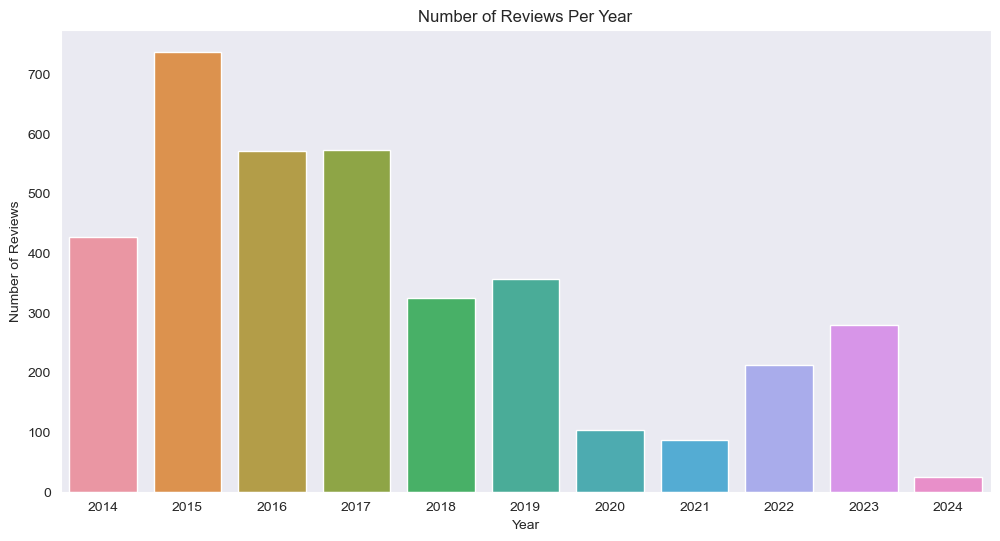

In [86]:
year = df['date'].dt.year

# Count the number of reviews per year
reviews_per_year = year.value_counts().reset_index()
reviews_per_year.columns = ['year', 'review_count']

# Sort by year for better plotting
reviews_per_year = reviews_per_year.sort_values(by='year')

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='review_count', data=reviews_per_year)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews Per Year')

# Show the plot
plt.show()

#### Most Reviews ever received were in 2015-2017

<Figure size 1200x600 with 0 Axes>

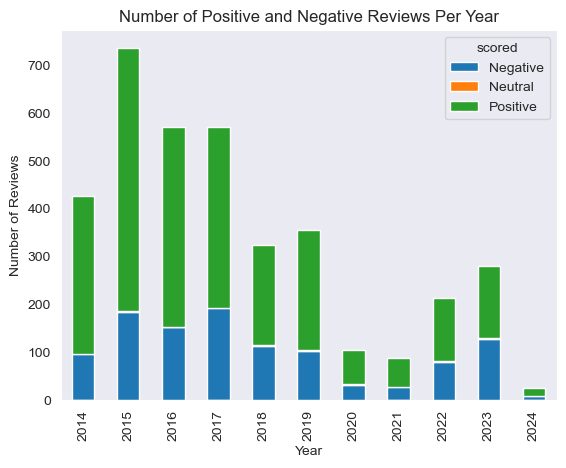

In [88]:
df['year'] = df['date'].dt.year

reviews_by_score_and_year = df.groupby(['year', 'scored']).size().unstack(fill_value=0).reset_index()

# Sort by year for better plotting
reviews_by_score_and_year = reviews_by_score_and_year.sort_values(by='year')

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
ax = reviews_by_score_and_year.plot(x='year', kind='bar', stacked=True)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Positive and Negative Reviews Per Year')

# Show the plot
plt.show()

### The graph shows that almost a third of all reviews were Negative in Initial Years but as Years progress the number of Negative Reviews have increased as seen in 2022 and 2023, which were almost half of negative.

In [116]:
def get_bigram_freq_dist(reviews, number_of_ngrams, title):
    words = reviews.split(" ")
    new_words = [word for word in words if word.lower() not in stop_words]

    ngrams_list = list(bigrams(new_words))
    ngram_fd = FreqDist(ngrams_list).most_common(40)
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    df_ngram = pd.DataFrame(list(ngram_joined.items()), columns=['Bigram', 'Frequency'])

    plt.figure(figsize=(10, 10))
    plt.barh(df_ngram['Bigram'], df_ngram['Frequency'])
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.title(f'Bigram Frequency Distribution for {title} Ratings ({number_of_ngrams}-grams)')
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23060\1162966339.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_by_category = df.groupby('rating_category')['corpus'].apply(lambda x: ' '.join(x))


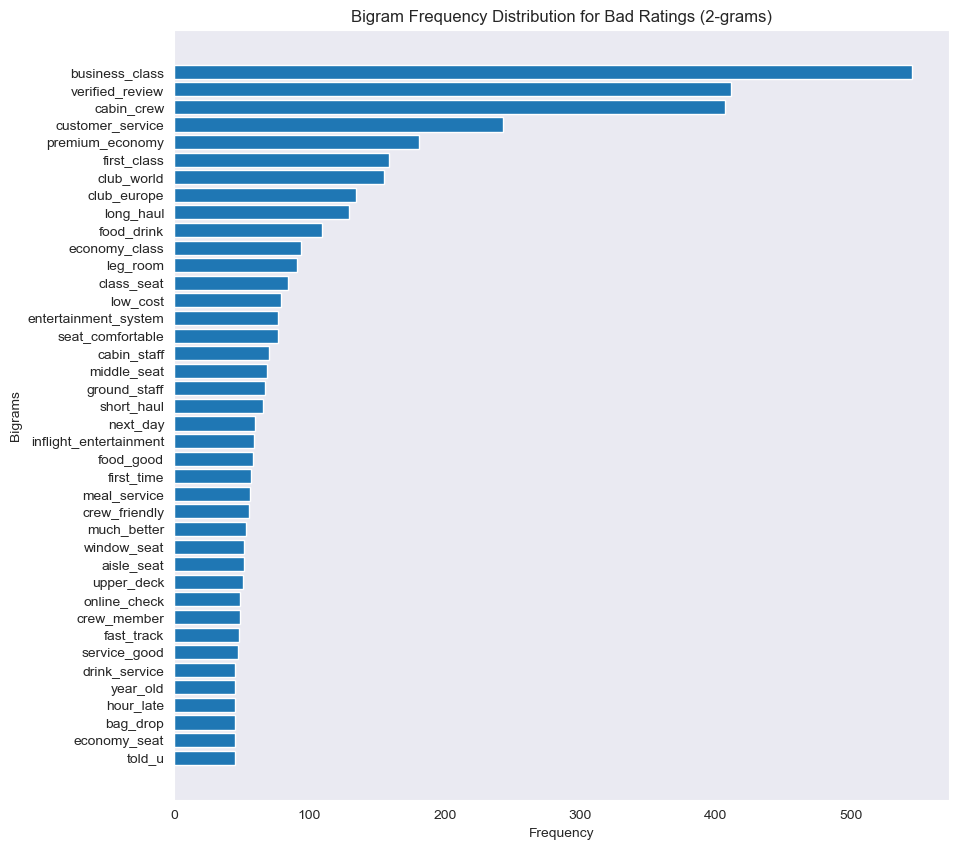

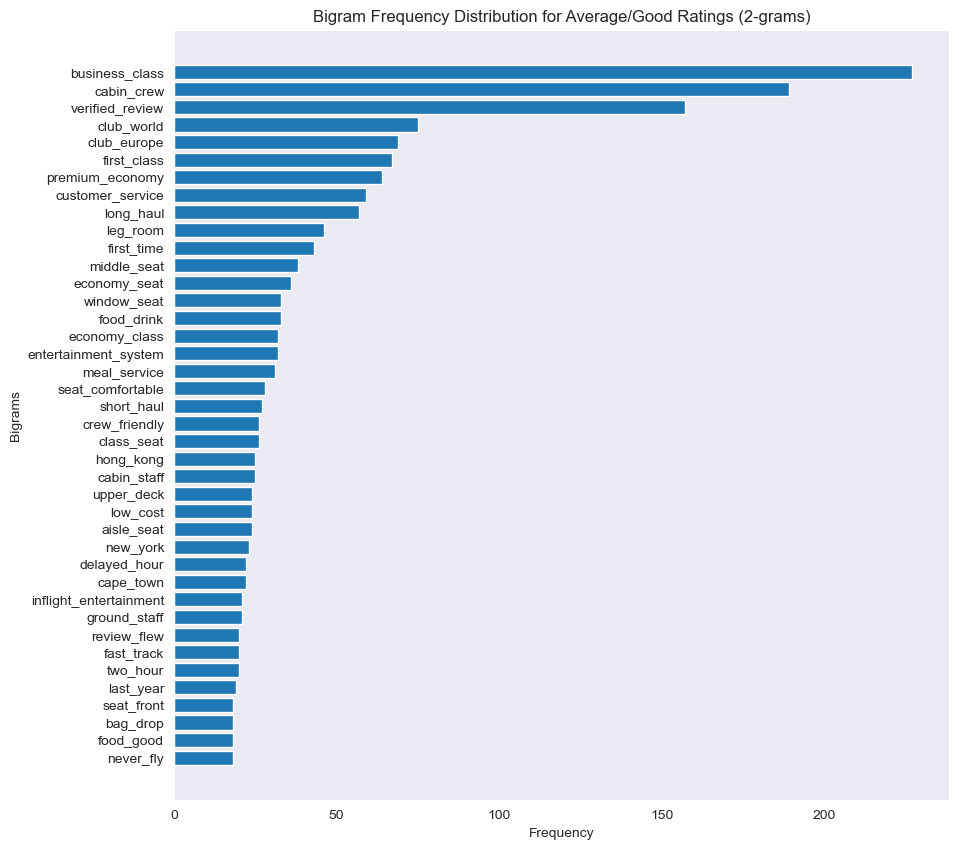

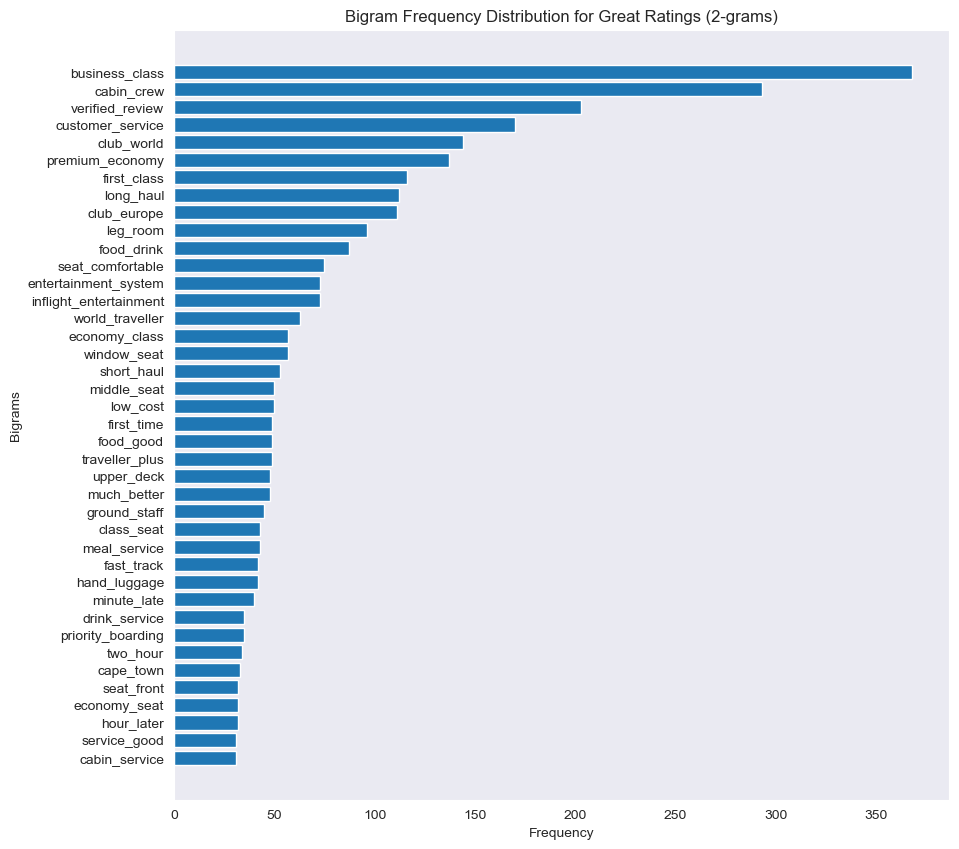

In [117]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

bad_reviews = [1, 2, 3]
average_good_reviews = [4, 5, 6]
great_reviews = [7, 8, 9, 10]

df['rating_category'] = pd.cut(df['stars'],
                               bins=[0, 3, 6, 10],
                               labels=['Bad', 'Average/Good', 'Great'],
                               include_lowest=True)

reviews_by_category = df.groupby('rating_category')['corpus'].apply(lambda x: ' '.join(x))
for category, reviews in reviews_by_category.items():
    if category == 'Bad':
        title = 'Bad'
    elif category == 'Average/Good':
        title = 'Average/Good'
    else:
        title = 'Great'
    get_bigram_freq_dist(reviews, 2, title)  # Adjust the number_of_ngrams as needed


In [46]:
#!pip install textblob
from textblob import TextBlob, Word

In [52]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df['polarity'] = df['reviews'].apply(polarity_calc)


df['scored'] = df['polarity'].apply(tag_cal)

df.head(-1)

,Id,reviews,stars,date,country,corpus,polarity,scored
0,0,Not Verified | We have flown BA five times fr...,5,2024-02-17,United States,flown ba five time western usa england always ...,-0.176282,Negative
1,1,✅ Trip Verified | London Heathrow to Istanbul...,3,2024-02-17,United Kingdom,london heathrow istanbul start half term schoo...,0.044923,Positive
2,2,"Not Verified | Jan 30th, I booked a last-minut...",3,2024-02-16,United States,jan th booked last minute transatlantic flight...,-0.059213,Negative
3,3,✅ Trip Verified | I am a British Airways Gold ...,2,2024-02-11,United States,british airway gold guest list member lifetime...,0.155000,Positive
4,4,Not Verified | Another case of reviewing Brit...,5,2024-02-08,United Kingdom,another case reviewing british airway flight a...,0.116667,Positive
...,...,...,...,...,...,...,...,...
3689,3694,BA Heathrow to Madrid Club Euro. Disappointing...,10,2014-05-26,United Kingdom,ba heathrow madrid club euro disappointing ser...,0.115152,Positive
3690,3695,Club Europe London Heathrow T3 to Lisbon. T3 l...,5,2014-05-26,United Kingdom,club europe london heathrow lisbon lounge good...,0.284458,Positive
3691,3696,TXL-LHR-SFO. TXL-LHR on an A321 it was an unev...,6,2014-05-25,India,txl lhr sfo txl lhr uneventful flight drink se...,0.190972,Positive
3692,3697,San Diego return business class (the seat was ...,7,2014-05-24,United Kingdom,san diego return business class seat comfortab...,0.160000,Positive


In [53]:
(df.groupby('scored').size()/df['scored'].count())*100

scored
Negative    29.851150
Neutral      0.433018
Positive    69.715832
dtype: float64

### The Reviews 70% Positive while 30% Negative despite the low Reviews